<p><font align = 'justify' size="10" color="Orange" face="Calibri" color="RedOrange">Homework8</font></p>

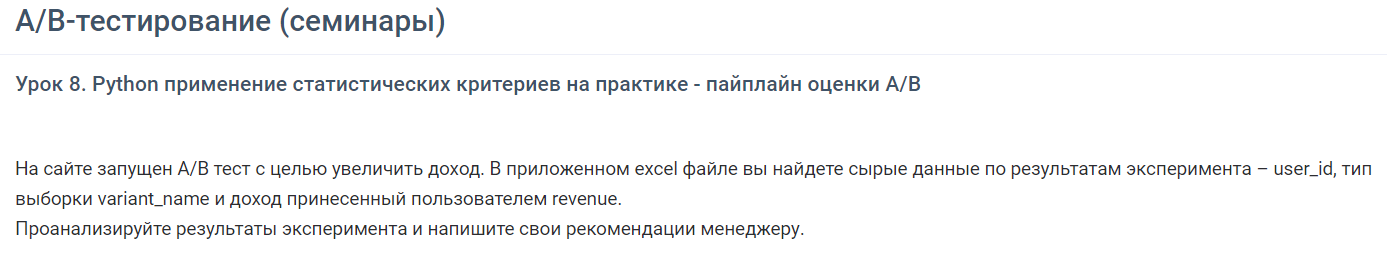

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

<p><font align = 'justify' size="8" color="Orange" face="Calibri" color="RedOrange">Task 1</font></p>

In [9]:
ab_test_url = 'https://docs.google.com/spreadsheets/d/1-glQlR-KfTUsA2tCfot5IVTw0a2wn3WP2IvCM5Kog9w/export?format=csv&gid=165512576'

In [10]:
ab_test = pd.read_csv(ab_test_url)

<p><font align = 'justify' size="8" color="Green" face="Calibri" color="RedOrange">Exploratory Data Analysis (EDA)</font></p>

In [12]:
ab_test.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [7]:
ab_test['REVENUE'].describe()

count    10000.000000
mean         0.099447
std          2.318529
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        196.010000
Name: REVENUE, dtype: float64

In [8]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [9]:
ab_test.isnull().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

<Axes: xlabel='REVENUE', ylabel='Count'>

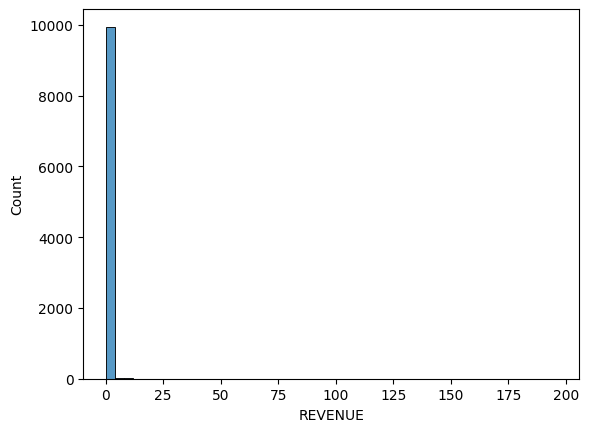

In [10]:
sns.histplot(data=ab_test, x='REVENUE', bins=50)

<Axes: >

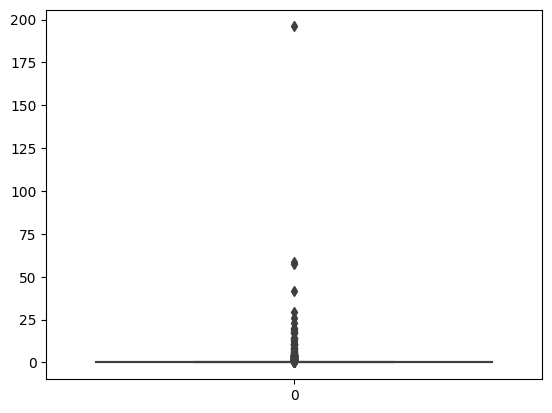

In [11]:
sns.boxplot(data=ab_test['REVENUE'])

In [12]:
ab_test_revenue_max = ab_test['REVENUE'].max()
ab_test_revenue_max

196.01

<p><font align = 'justify' size="8" color="Green" face="Calibri" color="RedOrange">Transforming data</font></p>

In [13]:
ab_test[ab_test['REVENUE'] < ab_test['REVENUE'].quantile(0.985)]

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


In [14]:
ab_test_cut = ab_test[ab_test['REVENUE'] > 0]

In [15]:
ab_test_cut = ab_test_cut[ab_test_cut['REVENUE'] < ab_test_cut['REVENUE'].quantile(0.985)]

<Axes: xlabel='REVENUE', ylabel='Count'>

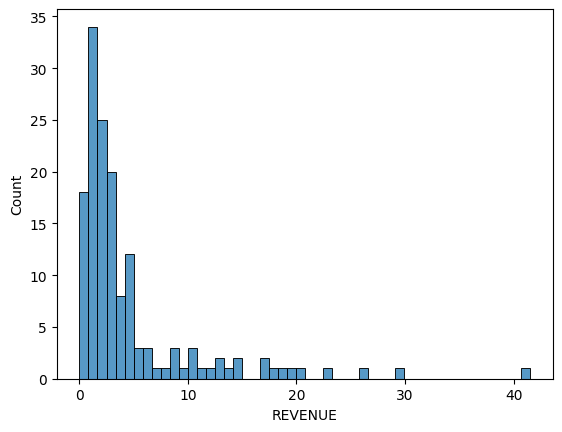

In [16]:
sns.histplot(data=ab_test_cut, x='REVENUE', bins=50)

In [18]:
sample_A = ab_test_cut[ab_test_cut['VARIANT_NAME'] == 'control']

In [19]:
sample_B = ab_test_cut[ab_test_cut['VARIANT_NAME'] == 'variant']

<p><font align = 'justify' size="8" color="Green" face="Calibri" color="RedOrange">Analisys</font></p>

<Axes: xlabel='REVENUE', ylabel='Count'>

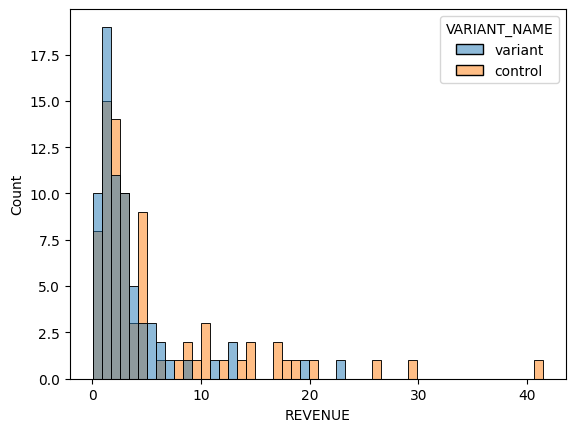

In [20]:
sns.histplot(data=ab_test_cut, x='REVENUE', bins=50, hue="VARIANT_NAME")

<Axes: >

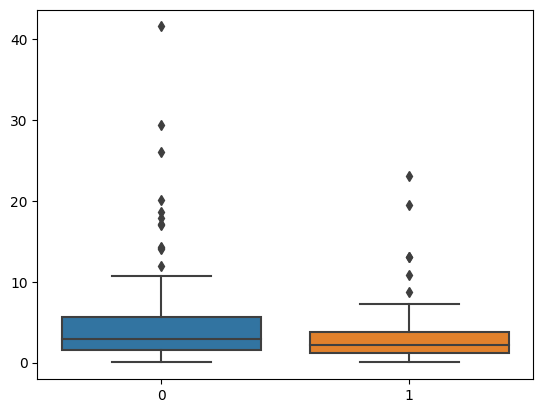

In [21]:
sns.boxplot([sample_A['REVENUE'], sample_B['REVENUE']])

In [22]:
print(sample_A['REVENUE'].mean())
print(sample_B['REVENUE'].mean())

5.6581012658227845
3.362571428571428


In [23]:
result = st.mannwhitneyu(sample_A['REVENUE'], sample_B['REVENUE'])

In [24]:
print(result)

MannwhitneyuResult(statistic=3284.0, pvalue=0.04853293236952111)


<p><font align = 'justify' size="8" color="Green" face="Calibri" color="RedOrange">Conclusion</font></p>
<p align = 'justify'><font size="3" color="DarkBlue" face="Calibri"><b>H0 не подтверждается => Существуют статистически значимые различия между 'control' и 'variant'.<br>
Но так как мы существенно уменьшили выборку исключив нули, то мощность очень сильно снизилась.</b></font></p>